<a href="https://colab.research.google.com/github/kurtzace/complete-data-science-bootcamp-excercises/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Categorical variables. Visualization techniques |   scene
-- | --
Background | There is an ice cream   shop, that is operating in New York, LA and San Francisco.
Data | You have sold 12,327 ice   creams in New York; 17,129 in LA and 19,923 in San Francisco.
Task | Order the data in a   frequency distribution table. |   |  

In [2]:
import pandas as pd
data = [['NY',12327],['LA',17129],['SF',19923]]
df = pd.DataFrame(data,columns=['City','Sold'])
df

,City,Sold
0,NY,12327
1,LA,17129
2,SF,19923


<BarContainer object of 3 artists>

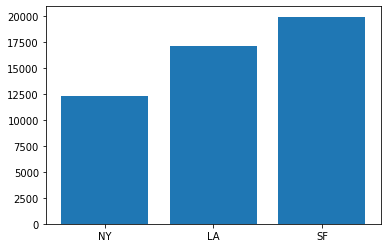

In [8]:
import matplotlib.pyplot as plt
plt.bar(df["City"],df["Sold"])

In [18]:
df['relFreq']=df["Sold"]/(df["Sold"].sum())
df

,City,Sold,relFreq
0,NY,12327,0.249641
1,LA,17129,0.346888
2,SF,19923,0.403471


([<matplotlib.patches.Wedge at 0x7f2e0897d610>,
 [Text(0.7786953361784816, 0.7769385905037035, 'NY'),
  Text(-0.9740266733802704, 0.5111477668382838, 'LA'),
  Text(0.32849059675245446, -1.0498066144986975, 'SF')])

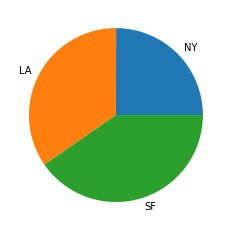

In [22]:
plt.pie(df["relFreq"], labels=df["City"])

In [32]:
df = df.sort_values("Sold", ascending=False,axis=0)

  City   Sold   relFreq  Cumulative
2   SF  19923  0.403471    0.403471
1   LA  17129  0.346888    0.750359
0   NY  12327  0.249641    1.000000


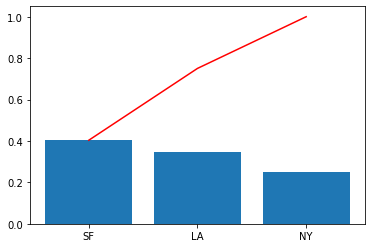

In [40]:
df["Cumulative"]=df["relFreq"].cumsum()
print(df)
plt.bar(df["City"],df["relFreq"])
plt.plot(df["City"],df["Cumulative"],'r')
plt.show()